In [2]:
### author : hyungil ed kim
### date : 21.03.15

### data science in python
### 1. linear regression 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''
python data import
with open('Dataset_1.csv') as file:
    data =[]
    for line in file.readlines():
        data.append(list(map(float,line.rstrip().split(','))))
    print(data[0])

#numpy data import
data_1 = np.loadtxt('Dataset_1.csv', delimiter = ',')
print(data_1[0])
'''
# pandas data import
data = pd.read_csv('Dataset_1.csv', header = None)
data.columns = ['population', 'profit']

In [3]:
data["population"]

0      6.756771
1      5.948906
2      8.951095
3      7.588211
4      6.621710
        ...    
92     6.517264
93     5.835273
94     8.602265
95    13.547492
96     5.797456
Name: population, Length: 97, dtype: float64

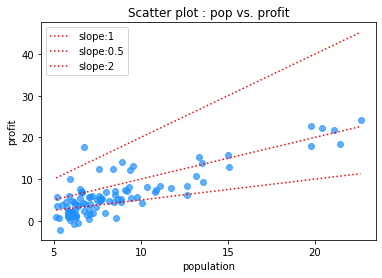

In [5]:
plt.scatter(data["population"], data["profit"], color = 'dodgerblue', alpha = 0.7)
plt.xlabel('population')
plt.ylabel('profit')
plt.title('Scatter plot : pop vs. profit')


# linear fit
a = np.array([min(data["population"]), max(data["population"])])
plt.plot(a, a*1, 'r:', label='slope:1')
plt.plot(a, a*.5, 'r:',label='slope:0.5')
plt.plot(a, a*2, 'r:', label='slope:2')
plt.xticks([5,10,15,20])
plt.legend()
plt.show()

In [9]:
# 비용함수 정의
def costFunc(X, y, a, b):
    return sum((X*a + b - y)**2)/(2*len(y))
# gradident descent a, b에 대한 함수 정의
def gd_a(X, y, a, b):
    return sum((X*a + b - y)*X)/len(y)
def gd_b(X, y, a, b):
    return sum(X*a + b - y)/len(y)

# training 함수 정의
def train(X, y, iteration, learning_rate):
    a, b =0, 0
    for _ in range(iteration):
        g_a = gd_a(X,y,a,b)
        g_b = gd_b(X,y,a,b)
        a -= learning_rate * g_a
        b -= learning_rate * g_b
    return [a, b]
# 함수 적용
X, y = data["population"], data["profit"]
a, b = train(X, y, 20000, 0.00001)

In [10]:
# 최종 slope, intercept 결과값
print(a, b)

0.8103477861903209 -0.05336980676125333


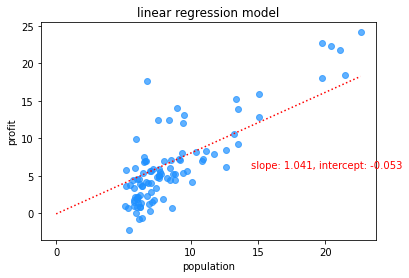

In [11]:
# 그래프 시각화
plt.scatter(X, y, color = 'dodgerblue', alpha = 0.7)
plt.plot([0, max(X)], np.array([0, max(X)])*a+b, 'r:')
plt.xticks([0,10,15,20])
plt.title("linear regression model")
plt.xlabel('population')
plt.ylabel('profit')
# linear regression result print
plt.text(14.5,6,'slope: 1.041, intercept: -0.053', color='r')
plt.show()

In [12]:
# train 함수 convergence 확인
def train_chk(X, y, iteration, learning_rate):
    a, b =0, 0
    iterList = []
    aList, bList = [], []
    for i in range(iteration):
        g_a = gd_a(X,y,a,b)
        g_b = gd_b(X,y,a,b)
        a -= learning_rate * g_a
        b -= learning_rate * g_b
        if (i+1) % 200 == 0:
            iterList.append(i+1)
            aList.append(a)
            bList.append(b)
    return aList, bList, iterList

n_iteration, n_learning_rate = 20000, 0.00001
slopes, incepts, iters = train_chk(X, y, n_iteration, n_learning_rate)


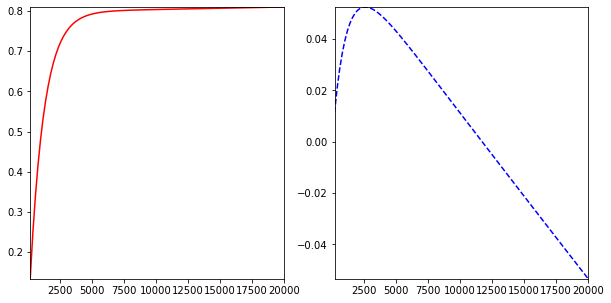

In [13]:
# convergence 확인
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(iters, slopes, 'r')
plt.axis([min(iters),max(iters),min(slopes), max(slopes)])
plt.subplot(122)
plt.plot(iters, incepts, 'b--')
plt.axis([min(iters),max(iters),min(incepts), max(incepts)])
plt.show()

### convergence 이슈 분석
#### x, y 입력값을 scaling 하지 않았고, outlier 성 데이터를 전처리하지 않은채 선형회귀식을 입력하였음
#### slope 값의 경우 iteration에 따라 수렴하나, intercept의 경우 learning rate를 작게 잡았음에도 수렴하지 않음
#### 본 예제에서는 데이터 전처리를 포함하지 않았으며, 추후 데이터 모델링에서는 전처리를 진행할 예정


In [14]:
# cost function 그리드 탐색

intercept = np.arange(-10,10,(20/100))
slope = np.arange(-2,4,(6/100))
costList = np.zeros((intercept.size, slope.size))

X_n, y_n = data["population"], data["profit"]

for i in range(intercept.size):
    for j in range(slope.size):
        costList[i][j] = costFunc(X_n, y_n, slope[j], intercept[i])

print(costList[1][1])

621.158734147519


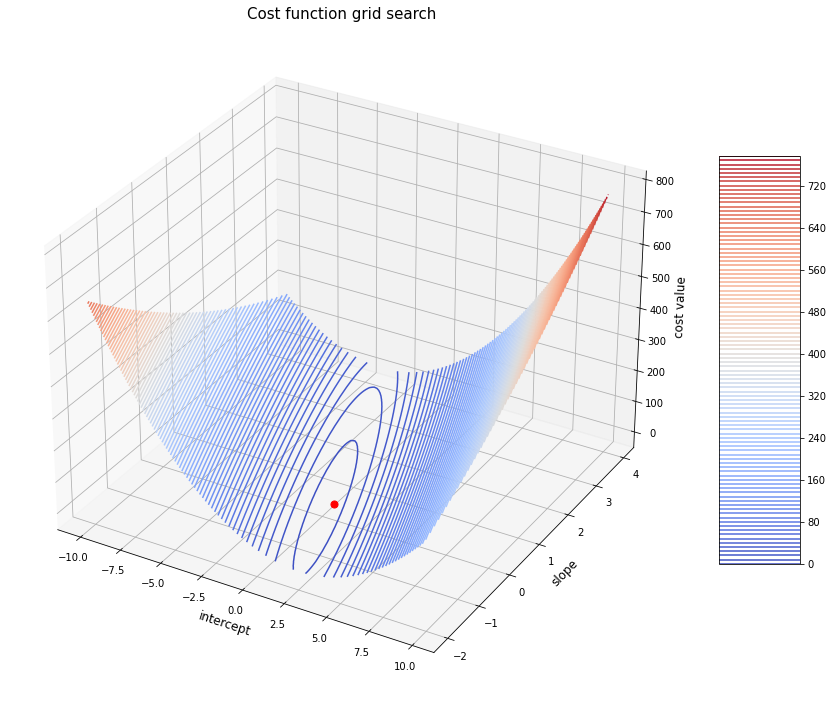

In [15]:
# 3차원 cost 값 시각화
# reference : https://pbj0812.tistory.com/346

from matplotlib import cm

fig = plt.figure()
fig.set_size_inches(15, 15)
ax = plt.axes(projection='3d')
surf = ax.contour3D(intercept, slope, costList, 100, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('intercept',fontsize=12)
ax.set_ylabel('slope',fontsize=12)
ax.set_zlabel('cost value',fontsize=12)
ax.set_title('Cost function grid search', fontsize=15)
# gradient descent 최종 결과값 point 출력
ax.scatter(a, b, costFunc(X, y, a, b), marker='o', s=50, c='r')
plt.show()